# 1. Introduction 
- Statistic model (mô hình thống kê) là mô hình toán học đại diện cho các khía cạnh của thế giới thực, nó có thể đơn giản nhưng đôi khi cũng vô cùng phức tạp 


In [2]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 
import pandas as pd 


# 2. General Linear Models 
- Một mô hình thống kê là một tập các phương trình liên quan tới giá trị  dự đoán (biến độc lập) và các quan sát (biến phụ thuộc)
- Kí hiệu trong mô hình thống kê và tuyến tính : 
<table>
  <thead>
    <tr>
      <th>LinAlg</th>
      <th>Stats</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
  <tr>
    <td>Ax = b</td>
    <td>X $$\beta$$ = y </td>
    <td>Mô hình tuyến tính</td>
  </tr>
  <tr>
    <td>A</td>
    <td>X</td>
    <td>Ma trận chứa input</td>
  </tr>
  <tr>
    <td>x</td>
    <td>$$\beta$$</td>
    <td>Ma trận hệ số</td>
  </tr>
  <tr>
    <td>b</td>
    <td>y</td>
    <td>Ma trận dự đoán</td>
  </tr>
  
  </tbody>
</table>

## Xây dựng mô hình GLM 
- Để xây dựng GLM người ta có các bước sau : 
    1. Xác định phương trình liên quan giữa biến độc lập và biến phụ thuộc 
    2. Chiếu các dữ liệu quan sát vào phương trình 
    3. Chuyển đổi chuỗi phương trình thành ma trận 
    4. Giải hệ phương trình đó 

- Ví dụ ta có bài toán dự đoán chiều cao dựa trên cân nặng và chiều cao của bố mẹ khi đó ta có y là biến phụ thuộc và các biến độc lập : $\beta_{1}$ là chiều cao của bố mẹ,  $\beta_{2}$ là cân nặng, $\beta_{0}$ là hằng số, $\epsilon$ là sai số : $$ y = \beta_{0} + \beta_{1}w + \beta_{2}h + \epsilon $$

- Ta thực hiện mapping dữ liệu và chuyển hệ số trên thành ma trận và tính hệ số dựa vào ma trận 

In [3]:
y = np.random.randint(low = 160, high = 180, size=(4, 1))
w = np.random.randint(low = 60, high = 90, size =(4, 1))
h = np.random.randint(low = 160, high = 180, size =(4, 1) )

A = np.concatenate([np.ones((4, 1)),  w, h], axis = 1) 


In [4]:
A

array([[  1.,  86., 177.],
       [  1.,  88., 165.],
       [  1.,  89., 166.],
       [  1.,  80., 162.]])

In [5]:
y

array([[171],
       [161],
       [171],
       [177]])

=> Nhiệm vụ của ta là giải hệ phương trình Ax = y như trên để tìm ra hệ số x

## Solving GLMs 
- Để giải hệ phương trình trên, ta thực hiện khử X tại phía trái như sau : 
$$ Ax = y \\ (A^TA)^{-1}(A^TA)x =  (A^TA)^{-1}A^Ty \\ x = (A^TA)^{-1}A^Ty $$

In [6]:
x = np.linalg.inv(A.T@A)@A.T@y
print(x)

[[ 2.49378977e+02]
 [-1.24901944e+00]
 [ 1.65519045e-01]]


=> Phương trình cuối cùng trên được gọi là dạng least-square 
- Tuy nhiên, có một câu hỏi được đặt ra là liệu ta có luôn luôn giải hệ phương trình trên được hay không ?. Câu trả lời là không, điều kiện để giải được hệ phương trình trên đó là ma trận y phải nằm trong không gian cột của X (trên thực tế điều này thường không xảy ra)
- Nếu y trong columns space của A, điều này của nghĩa là mô hình đã capture lại 100% variance, điều này trên thực tế là không xảy ra do còn chứa những phần nhiễu ($\epsilon$).  
=> Do đó, người ta thường viết mô hình tuyến tính như sau : $$ Ax =  \hat{y}  \\ \hat{y} = y + \epsilon $$
=> Từ đó có thể thấy, mục tiêu của mô hình tuyến tính là tìm các hệ số x sao cho giá trị dự đoán (regressor) gần nhất với dữ liệu quan sát 

## Góc nhìn hình học trong Least Squares 
- Về góc nhìn hình học, ta chỉ cần đưa ra 2 khẳng định : 
    1. Liệu vector y (giá trị dự đoán) có nằm trong columns space của ma trận A hay không ? => Phần trên đã trả lời là không 
    2. Vậy vector nào nằm trong columns space gần nhất với vector y ? => hình chiếu của vector y xuống columns space của A, nhiệm vụ của ta là đi tìm các hệ số x sao cho vector $ \hat{y} $ là hình chiếu của y xuống columns space của A 
    

- Gọi $ Ax $ là hình chiếu của vector y lên trên columns space của A. Khi đó ta có: $$ A^T (y - Ax)  = 0 \\ A^T y - A^TAx  = 0 \\ x = (A^TA)^{-1}A^Ty $$  

In [7]:
import plotly.graph_objects as go


# Tạo vector
vector = np.array([1, 2, 3])

# Tạo vector pháp tuyến cho mặt phẳng (ví dụ: phương trình mặt phẳng x + y + z = 0)
normal_vector = np.array([1, 1, 1])

# Tính toán hình chiếu của vector lên mặt phẳng
projection = vector - np.dot(vector, normal_vector) / np.dot(normal_vector, normal_vector) * normal_vector

# Tạo mặt phẳng
xx, yy = np.meshgrid(range(-5, 6), range(-5, 6))
zz = -(normal_vector[0]*xx + normal_vector[1]*yy) / normal_vector[2]

# Tạo dữ liệu cho plotly
data = [
    go.Scatter3d(x=[0, vector[0]], y=[0, vector[1]], z=[0, vector[2]], name="Original Vector"),
    go.Scatter3d(x=[0, projection[0]], y=[0, projection[1]], z=[0, projection[2]], name="Projected Vector"),
    go.Surface(x=xx, y=yy, z=zz, opacity=0.5, colorscale='blues', showscale=False)
]

# Tạo layout cho plot
layout = go.Layout(scene=dict(
                    xaxis=dict(title='X'),
                    yaxis=dict(title='Y'),
                    zaxis=dict(title='Z')))

# Tạo figure và vẽ
fig = go.Figure(data=data, layout=layout)
fig.show()


## Góc nhìn giải tích trong Least Square 
- Mục tiêu của việc xây dựng mô hình đó là giảm thiểu sai số nhất có thể (đã để cập ở trên). Tuy nhiên sai số có thể âm hoặc dương do đó, ta có từ "square" để chỉ bình phương của sai số. Khi đó thực chất bài toán trở thành bài toán tối ưu:  $$ \min _{x} || Ax - y ||^2 $$ 
- Dưới góc nhìn giải tích, ta có thể sử dụng đạo hàm để tìm điểm cực tiểu của hàm số trên và kết  quả cũng dẫn tới solution như trên : $$ 2A^T(Ax - y) = 0  \\ A^TAx = A^Ty \\ x = (A^TA)^{-1}A^Ty $$

# 3. Ví dụ về GLM 

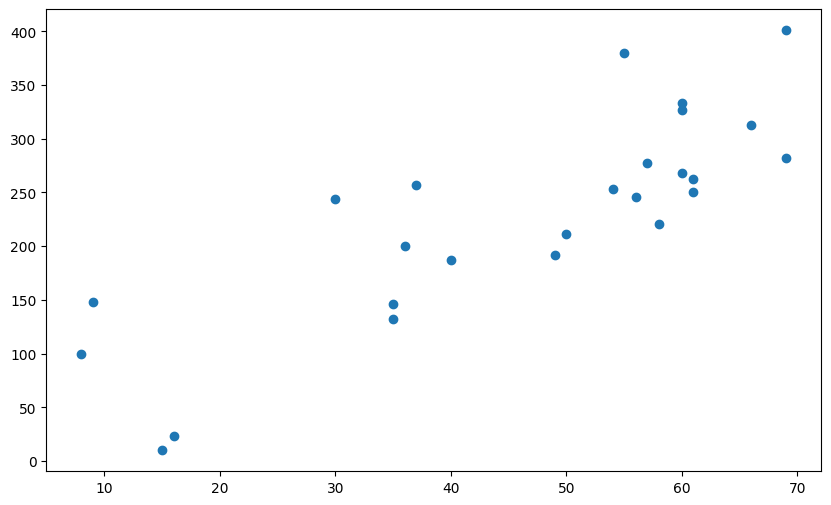

In [8]:
# fake data 

def fake_func(x): 
    return 5 * x + 7 +  np.random.randint(low=-100, high = 100, size = 1)

x = np.random.randint(low = 1, high = 70, size = (25, 1))
y = np.array([fake_func(i) for i in list(x)])

fig, ax = plt.subplots(figsize = (10, 6))

ax.scatter(x, y)


plt.show()

- Sử dụng close form ở trên, ta có thể tính được giá trị của tham số x trong phương trình trên và fit mô hình ta có :

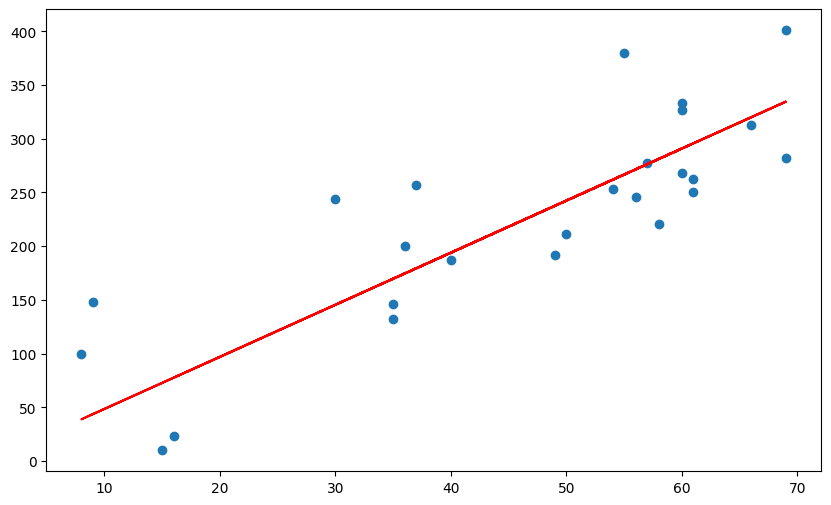

In [9]:
beta = np.linalg.inv(x.T @ x) @ x.T @ y 

y_hat =  x @ beta
fig, ax = plt.subplots(figsize = (10, 6))

ax.scatter(x, y)
ax.plot(x, y_hat, color = 'r')

plt.show()

In [10]:
mse = 0 
for i in range(len(y_hat)) : 
    mse += (y[i] - y_hat[i]) ** 2 

print(f'MSE: {mse}')

MSE: [74220.34591154]


- Xét thêm hằng số cho phương trình : $ y = ax + b $ :

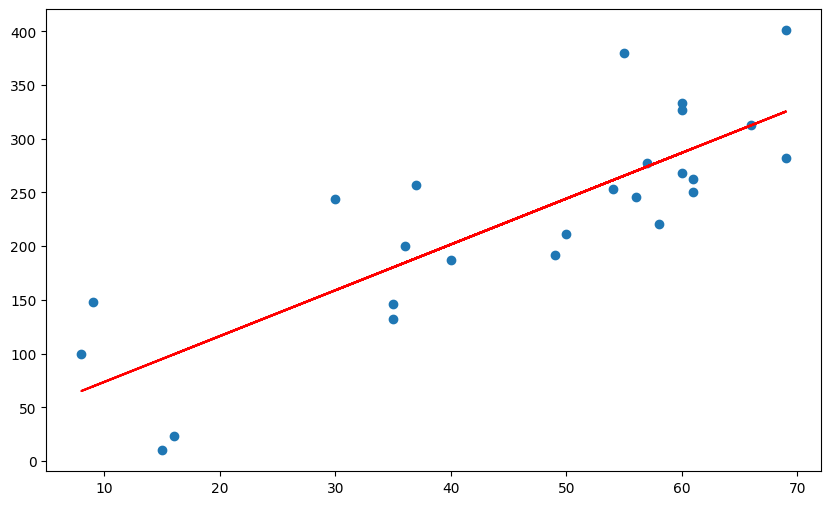

In [11]:
X = np.hstack((np.ones((25, 1)), x))

beta = np.linalg.inv(X.T @ X) @ X.T @ y 

y_hat =  X @ beta
fig, ax = plt.subplots(figsize = (10, 6))

ax.scatter(X[:, 1], y)
ax.plot(X[:, 1], y_hat, color = 'r')

plt.show()


In [12]:
mse = 0 
for i in range(len(y_hat)) : 
    mse += (y[i] - y_hat[i]) ** 2 

print(f'MSE: {mse}')

MSE: [70894.8039566]


# 4. Least Squares thông qua QR 
- Việc tính toán ma trận nghịch đảo trực tiếp có thể gây ra sai số, người ta có thể sử dụng phép tách QR phục vụ cho việc tính Least square. 
- Ta có thể áp dụng như sau : $$ Ax = y \\ QRx = y \\ Rx = Q^Ty \\ x = R^{-1}Q^Ty $$
- Sử dụng QR sẽ không cần tính $ X^TX$ và ma trận nghịch đảo 

# 5. Ứng dụng của Least Squares
- Trong phần này, ta sẽ nghiên cứu những áp dụng của least squares trong các mô hình thống kê, học máy như multicollinearity, polynomial regression,...



## Predict bike retals based on weather 
- Dữ liệu : dữ liệu bao gồm 9000 quan sát về số lượng xe được thuêở thành phố và 10 thuộc tính về thời tiết.
- Bài toán: Mục đích chính của bài toán đó là xác định nhu cầu thuê xe dựa trên thời tiết và mùa. 

In [13]:
# import data 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
data = pd.read_csv(url,sep=',',encoding='unicode_escape')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


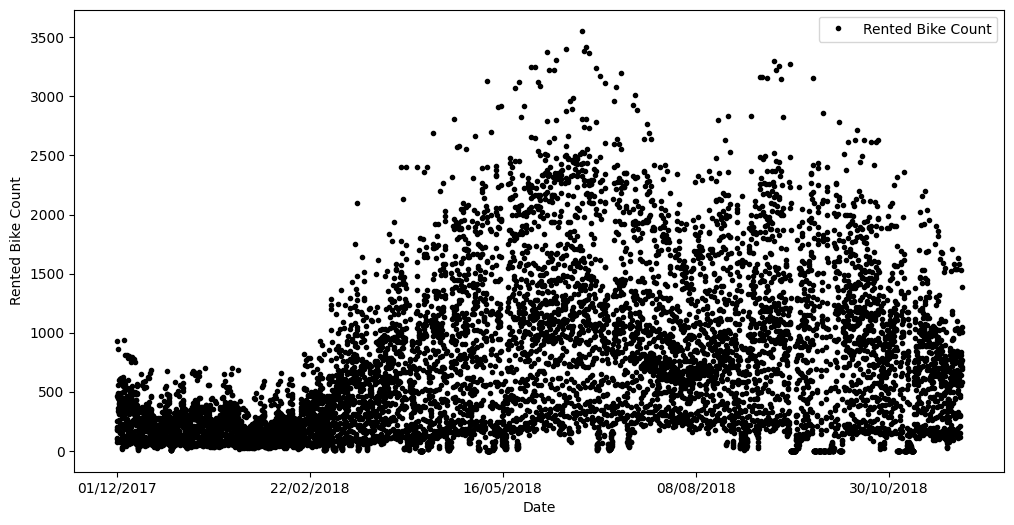

In [14]:
data.plot(x = 'Date', y = 'Rented Bike Count', color='k',marker='.',linestyle='none',
          figsize=(12,6),ylabel='Rented Bike Count')
plt.show()

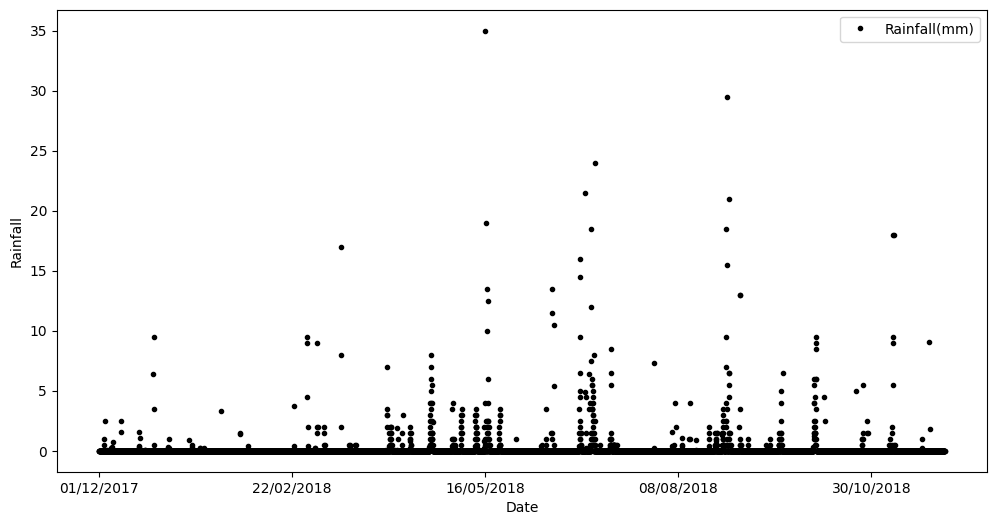

In [15]:
data.plot(x = 'Date', y = 'Rainfall(mm)', color='k', marker='.', linestyle='none', figsize = (12, 6), ylabel = 'Rainfall')
plt.show()

- Ta xây dựng ma trận corr để xem tương quan giữa các biến trong dữ liệu 

In [16]:
data_corr = data.drop(['Date', 'Seasons',  'Holiday', 'Functioning Day'], axis = 1).corr()

data_corr

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


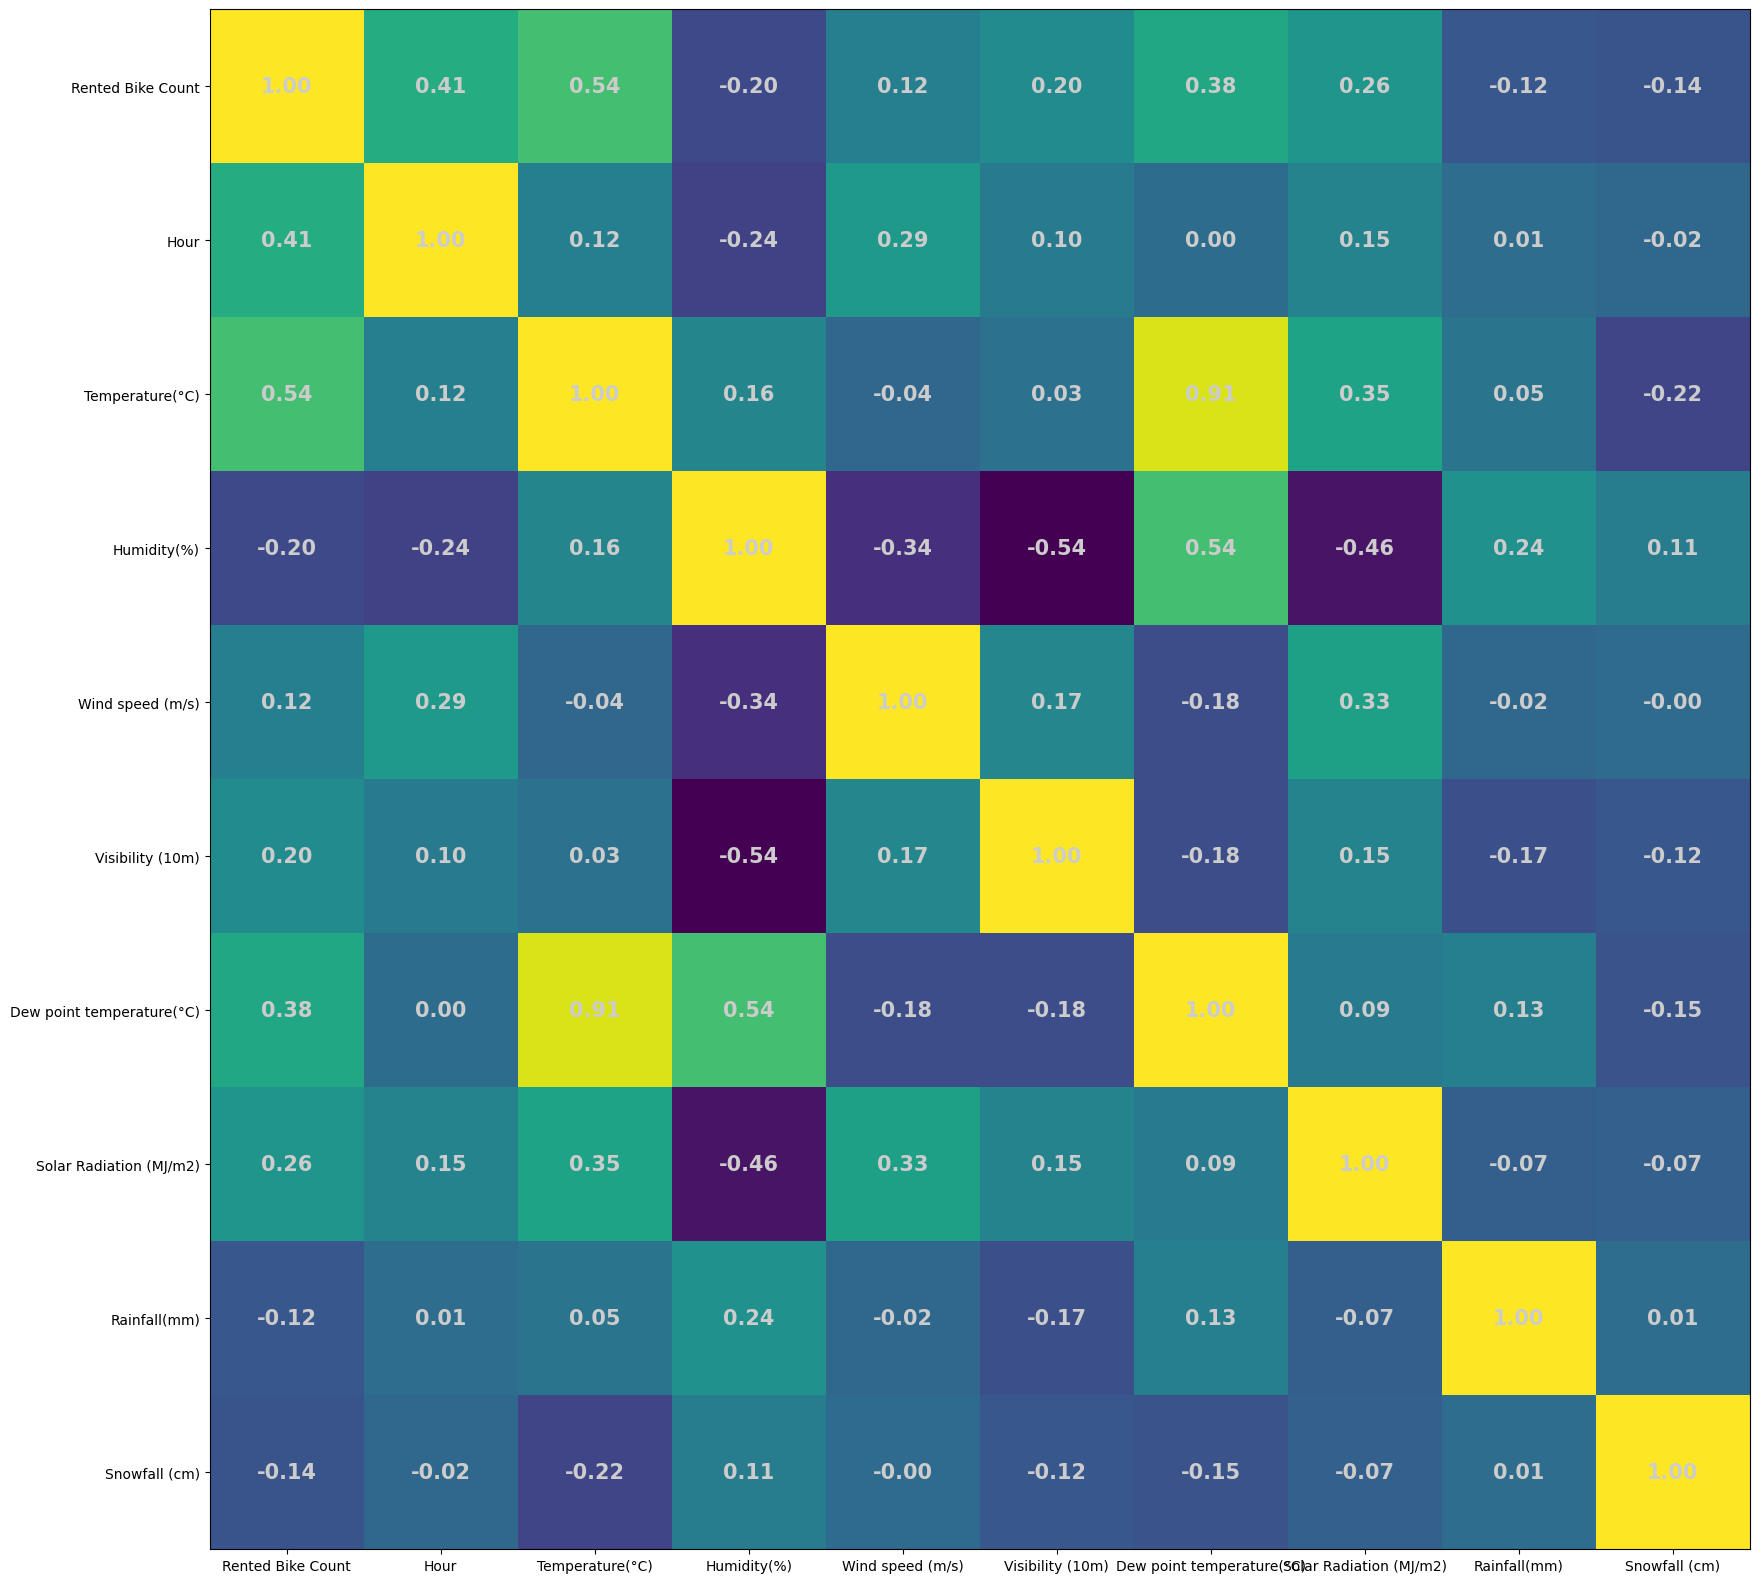

In [17]:

plt.figure(figsize=(20,20))
plt.imshow(data_corr.values)
plt.xticks(range(len(data_corr)),labels=data_corr.index)
plt.yticks(range(len(data_corr)),labels=data_corr.index)

# text labels
for (j,i),num in np.ndenumerate(data_corr.values):
  plt.text(i,j,f'{num:.2f}',color=[.8,.8,.8],ha='center',va='center',fontweight='bold',fontsize=15)

plt.show()

- Dựa vào bảng giá trị trên, ta sẽ lựa chọn các trường: rainfall và seasons cho việc dự đoán. 
- Đầu tiên, ta cần encode lại trường seasons như sau : 

In [18]:
data.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True)
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,No Holiday,Yes


In [19]:
# create design matrix 
desmat = data[['Rainfall(mm)', 'Seasons']].to_numpy()

desmat = np.append(desmat, np.ones((desmat.shape[0], 1)), axis  = 1)

y = data['Rented Bike Count'].to_numpy()


- Ta biểu diễn lại các giá trị trong ma trận design (ma trận đầu vào). Sử dụng scale là 0 và 1, vùng màu trắng đại diện cho  giá trị 1 và màu đen đại diện cho giá trị là 0.
- Giá trị intercept luôn nhận giá trị là 1, do đó biểu diễn vùng này có giá trị trắng.  

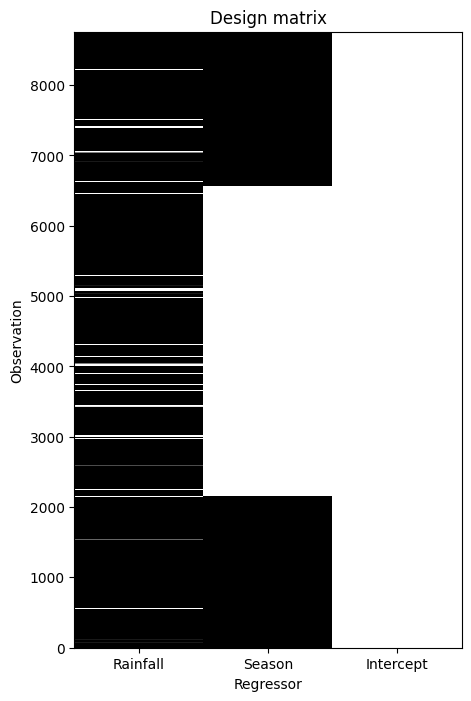

In [20]:
plt.figure(figsize=(5,8))
plt.imshow(desmat,aspect='auto',vmin=0,vmax=1,origin='lower',interpolation='nearest',cmap='gray')
plt.ylabel('Observation')
plt.xlabel('Regressor')
plt.title('Design matrix')
plt.xticks(range(3),labels=['Rainfall','Season','Intercept'])
plt.show()

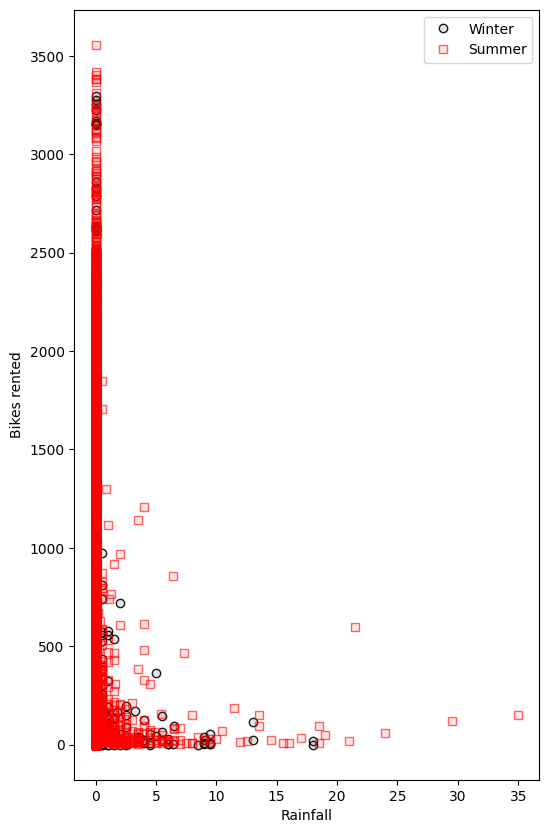

In [21]:
plt.figure(figsize = (6, 10))

plt.plot(desmat[desmat[:, 1]  == 0 , 0], y[desmat[:, 1] == 0] , 'o', markerfacecolor = (0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(desmat[desmat[:, 1] == 1 , 0], y[desmat[:, 1] == 1], 's', markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.xlabel('Rainfall')
plt.ylabel('Bikes rented')
plt.legend()
plt.show()

=> Dễ thấy, biểu diễn trên là không tuyến tính do hầu hết Rainfall đều bằng 0, do đó ta cần một cách biểu diễn khác

In [22]:
beta = np.linalg.lstsq(desmat, y ,  rcond =  None)
beta

(array([-80.52367456, 369.12668112, 530.49459615]),
 array([3.29151286e+09]),
 3,
 array([114.2084486 ,  99.04416813,  40.80408102]))

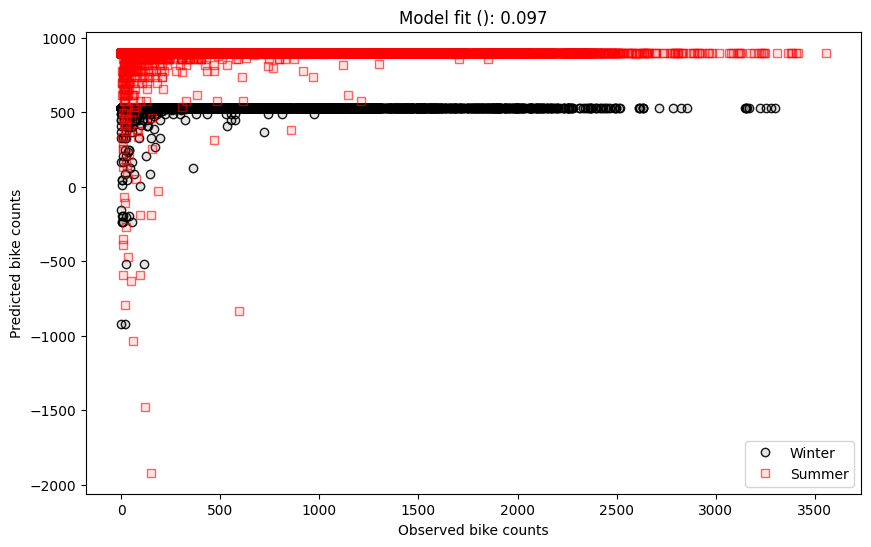

In [23]:
y_hat = desmat @ beta[0]

modelfit = np.corrcoef(y.T, y_hat.T)[0, 1]**2

plt.figure(figsize=(10,6))
plt.plot(y[desmat[:,1]==0],y_hat[desmat[:,1]==0],'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(y[desmat[:,1]==1],y_hat[desmat[:,1]==1],'s',markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')
plt.legend()
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit (): {modelfit:.3f}')
plt.show()

- Dựa vào model fit (tính tương quan giữa dữ liệu quan sát và dữ liệu dự đoán) ta có thể thấy, mô hình dự đoán chưa fit vào với dữ liệu tốt. Thông thường, hệ số tương quan giữa chúng phải gần 1 thì khi đó mô hình dự đoán ít nhất sẽ biểu diễn đúng hướng của dữ liệu 

- Có thể tổng kết kết quả của mô hình dựa thông qua thư viện statsmodels như sau: 

In [24]:
import statsmodels.api as sm 

desmat_df = data[['Rainfall(mm)','Seasons']]
obsdata_df = data['Rented Bike Count']

desmat_df = sm.add_constant(desmat_df)
model = sm.OLS(obsdata_df, desmat_df)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     468.8
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          3.80e-194
Time:                        15:06:18   Log-Likelihood:                -68654.
No. Observations:                8760   AIC:                         1.373e+05
Df Residuals:                    8757   BIC:                         1.373e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          530.4946      9.313     56.963   

### Multicollinearity 
- Multicollinearity có nghĩa là phụ thuộc tuyến tính trong design matrix hay design matrix là một ma trận  reduced-rank (rank có thể giảm). 
- Hiện tượng này có thể làm giảm khả năng dự đoán của mô hình do các feature có thể được dùng để dự đoán lẫn nhau, khiến các feature này không tác động nhiều lên việc đưa ra  gợi ý đúng, các hệ số (beta) khó phân biệt
- Người ta có thể sử dụng ma trận corr hoặc hệ số VIF để nhận dạng hiện tượng này 

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(X): 
    vif_matrix = pd.DataFrame()

    vif_matrix['variables'] = X.columns 

    vif_matrix ['VIF'] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif_matrix

vif(data.drop(['Date', 'Seasons',  'Holiday', 'Functioning Day'], axis = 1))

,variables,VIF
0,Rented Bike Count,4.128938
1,Hour,5.043107
2,Temperature(°C),36.351729
3,Humidity(%),5.507031
4,Wind speed (m/s),4.806546
5,Visibility (10m),9.104336
6,Dew point temperature(°C),17.334133
7,Solar Radiation (MJ/m2),2.914067
8,Rainfall(mm),1.104359
9,Snowfall (cm),1.121057


=> Hệ số vif = 1 tức là nó hoàn toàn độc lập tuyến tính </br>
=> Hệ só vif càng cao thì chúng càng phụ thuộc tuyến tính tức là nó có thể dự đoán dựa vào các giá trị khác trong dataset 

### Regularization 
- Regularization là một kĩ thuật đề cập tới nhiều cách chỉnh sửa lại mô hình thống kế với mục tiêu là cải thiện tính ổn định số học, tăng tính tổng quát để giảm thiểu overfitting, ... 
- Các kĩ thuật regularization khác nhau sẽ hoạt động theo cách khác nhau, "shift" design matrix một khoảng nhất định. 

##  Polynomial Regression 
- Polynomial regression tương tự như một regression thông thường với trục x được mũ lên. Mô hình toán học có dạng : $$ y = \beta_0  x^0 + \beta_1 x^1 + ... + \beta_n x^n $$
- Polynomial regression sử dụng đường cong để miêu tả các điểm dữ liệu 

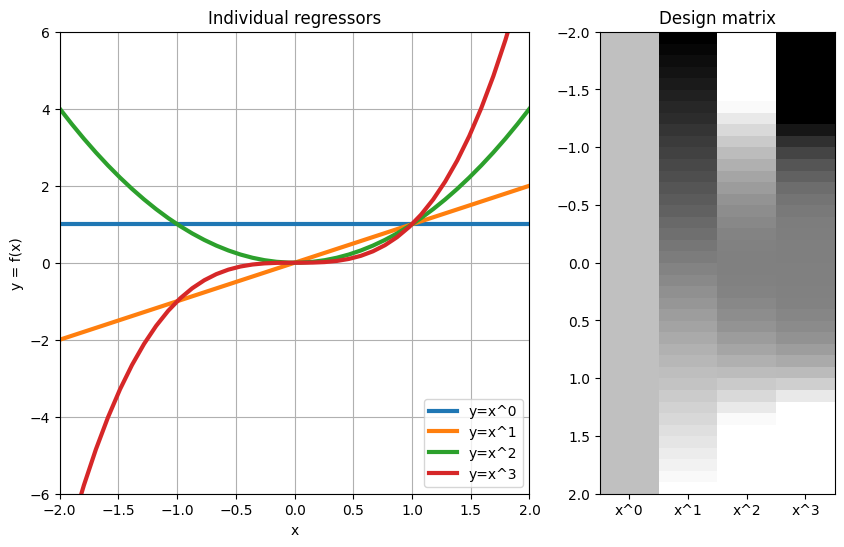

In [30]:

x = np.linspace(-2,2,40)
maxorder = 3
desmat = np.zeros((len(x),maxorder+1))
xlab = []


_,axs = plt.subplots(1,2,gridspec_kw={'width_ratios':[2,1]}, figsize=(10,6))

for i in range(maxorder+1):
  axs[0].plot(x,x**i,linewidth=3,label='y=x^%g'%i)
  desmat[:,i] = x**i
  xlab.append( 'x^%g'%i )

axs[0].set(xlim=[-2,2],xlabel='x')
axs[0].set(ylim=[-6,6],ylabel='y = f(x)')
axs[0].grid()
axs[0].legend()
axs[0].set_title('Individual regressors')

# draw the design matrix
axs[1].imshow(desmat,cmap='gray',aspect='auto',vmin=-2,vmax=2,extent=[-.5,maxorder+.5,x[-1],x[0]])
axs[1].set(xticks=range(maxorder+1),xticklabels=xlab)
axs[1].set_title('Design matrix')

plt.savefig('Figure_12_05.png',dpi=300)
plt.show()

### Ví dụ 
- Bài toán : Trả lời câu hỏi bao nhiêu lâu nữa số lượng người tăng lên gấp đôi. Tập dữ liệu bao gồm 2 trường đó là năm và khoảng bao lâu nữa thì dân số tăng gấp đôi (nếu  tỉ lệ sinh cao, giá trị của cột này sẽ giảm )

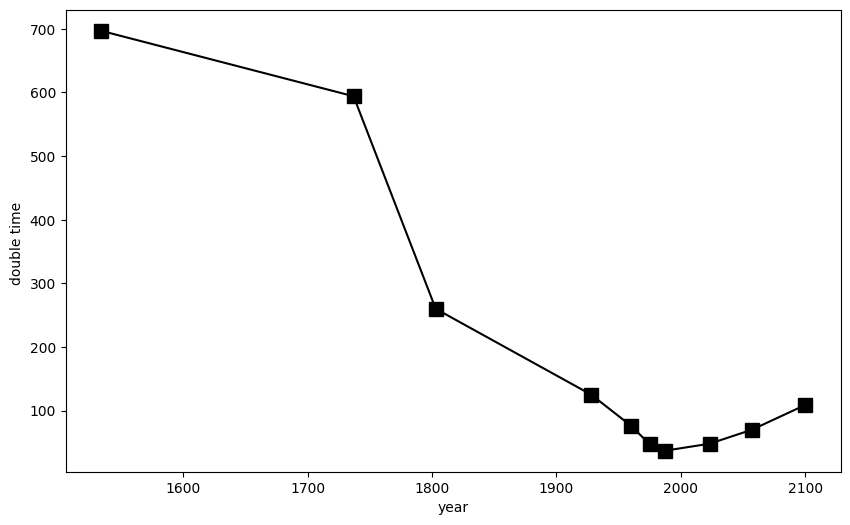

In [31]:
year       = [1534, 1737, 1803, 1928, 1960, 1975, 1987, 2023, 2057, 2100 ]
doubleTime = [ 697,  594,  260,  125,   76,   47,   37,   48,   70,  109 ]

plt.figure(figsize = (10,  6))
plt.plot(year, doubleTime, 'ks-', markersize = 10)

plt.xlabel('year')
plt.ylabel('double time ')

plt.show()

=> Dựa vào miêu tả dữ liệu như trên, ta sẽ lựa chọn polynomial với tham số mũ là 3 

In [32]:
# design matrix 

X = np.zeros((len(year), 4 ))

for i in range(4): 
    X[:, i] = np.array(year) ** i 

beta = np.linalg.lstsq(X, doubleTime, rcond=None)
y_hat = X @ beta[0]

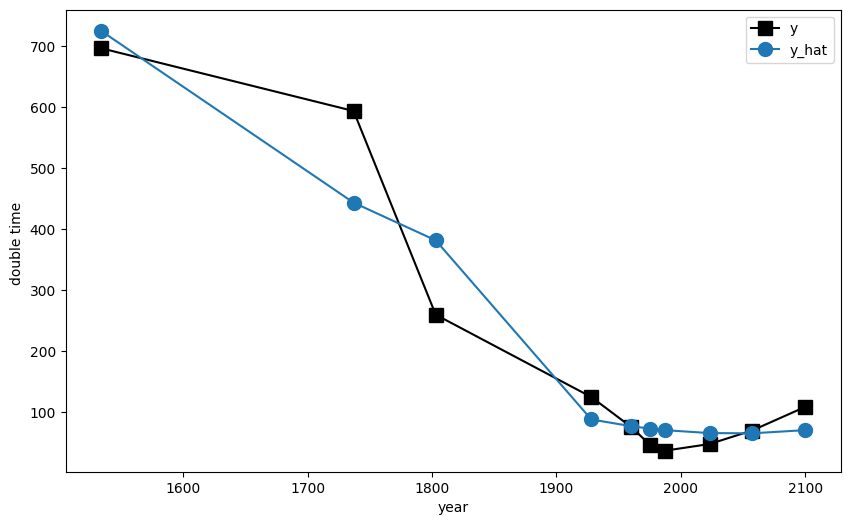

In [34]:
plt.figure(figsize = (10,  6))
plt.plot(year, doubleTime, 'ks-', markersize = 10, label = 'y')
plt.plot(year, y_hat, 'o-',markersize = 10, label = 'y_hat')
plt.xlabel('year')
plt.ylabel('double time ')
plt.legend()
plt.show()


=> Ta có thể thấy, mô hình có thể mô tả tương đuối chính xác hình dạng của điểm dữ liệu 

## Grid Search
- Grid search là một cách dùng để xác định các tham số của các mô hình non-linear, grid search hoạt động bằng cách lấy mẫu trong tập tham số và tính toán xem nó có fit với model hay không và lựa chọn model có fit nhất với dữ liệu 
- Grid search thường được dùng cho việc tìm các hyper-parameter cho các mô hình deeplearning, nó thường tốn thời gian và tài nguyên. 